Ako prvé je potrebné importovanie knižníc, ktoré budeme potrebovať v našej práci. Importujeme knižnice pandas, seaborn a priradíme im označenie, ktoré budeme písať, ak budeme nejakú z knižníc potrebovať. Ako ďalej si imprujeme modul pyplot z knižnice matplotlib a priradíme mu označenie plt. Ďalej budeme potrebovať importovať LabelEncoder z modulu preprocessing spadajúc do knižnice sklearn. Z knižnice sklearn budeme potrebovať aj KMeans pre klastrovanie.

In [33]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

Na načítanie datasetu použijeme funkciu read_csv z knižnice pandas, kde načítame dataset data.csv. Dataset uložíme do premennej df.

In [34]:
df = pd.read_csv('data.csv')

Pre výpis základných informácií o datasete použijeme funkciu info(), kde dostávame informácie ako názvy atribút, ich počet a dátový typ.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

Pre získanie počtu chýbajúcich hodnôt použijeme funkciu isna(), ktorá vratia hodnotu True ak hodnota chýba a hodnotu False ak nechýba. Implementáciou funkcie sum() získame počet chýbajúcich hodnôt pre každý stĺpec.

In [36]:
df.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

Do premennej phone_null_value uložíme tie riadky, ktoré majú hodnotu No pre atribút Phone Service a chýbajúcuce hodnoty v atribúte Multiple Lines a Avg Monthly Long Distance Charges. Funkciu shape slúži na zobrazenie počtu riadku a počtu stĺpcov. Hodnota 0 znamená, že sa zobrazí iba počet riadkov. Následným výpisom vypíšeme počet riadkov.

In [42]:
phone_null_value = df[(df['Phone Service'] == 'No') & ((df['Multiple Lines'].isnull())
                                                    & (df['Avg Monthly Long Distance Charges'].isnull()))].shape[0]
print("Počet nulových hodnôt v Multiple Lines a Avg Monthly Long Distance Charges, keď Phone Service == No:", phone_null_value)

Počet nulových hodnôt v Multiple Lines a Avg Monthly Long Distance Charges, keď Phone Service == No: 682


Výpisom tejto hodnoty zisťujeme, že ak je hodnota No pri atribúte Phone Service tak údaje pri atribútoch Multiplane Lines a Avg Monthly Long Distance Charges chýbajú. Preto pomocou funkcie fillna doplníme chýbajúce hodnoty. Musíme ale brať ohľad na dátové typy. Atribút Avg Monthly Long Distance Charges je numerický atribút, ktorý sa týka priemernej spotreby hovorov. Keď telefónnu službu nepoužívali dopĺníme hodnotu 0. Atribút Multiple Lines je kategorický atribút, ktorý sa týka toho, či využívajú viacero telefónnych liniek. Vzhľadom na to, že telefónnu službu nepoužívali dopĺníme chýbajúce hodnoty hodnotou No Phone Service. Parameter inplace zabezpečí, že sa doplnenie chýbajúcich hodnôt aplikuje na pôvodný dataset.

In [6]:
df['Avg Monthly Long Distance Charges'].fillna(0, inplace=True)
df['Multiple Lines'].fillna('No Phone Service', inplace=True)

Opätovným spustením príkazu df.isna().sum() si overíme, či sme úspešne doplnili chýbajúce hodnoty

In [7]:
df.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

Ďalšie atribúty, ktoré majú 1526 chýbajúcich hodnôt sa týkajú internetu, preto to vyriešime rovnako ako pri telefónnej službe. Avg Monthly GB Download je kategorický atribút preto pomocou funkcie fillna doplníme 0 vzhľadom na to, že nemôžu mať nejakú spotrebu ak nepoužívajú internet.

In [8]:
df['Avg Monthly GB Download'].fillna(0, inplace=True)

Ostatné atribúty kategoriálneho typu uložíme do zoznamu s názvom internet_columns. Pomocou cyklu for, ktorý prejde každý jeden atribút a doplní namiesto chýbajúcej hodnoty hodnotu No Internet Service.

In [9]:
internet_columns = ['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 
                    'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 
                    'Unlimited Data']

for column in internet_columns:
    df[column].fillna('No Internet Service', inplace=True)

Pomocou funkcie drop odstránime zadané atribúty. Priradením hodnoty 1 pre parameter axis dosiahneme, že sa operácia vykoná na stĺpcoch.

In [10]:
df.drop(['Churn Category', 'Churn Reason'], axis=1, inplace=True)

Do premennej atributs_with_missing_values uložíme počet atribútov, ktorý obsahujú chýbajúce hodnoty. Funkcia isna().any() vracia atributy, kde sa nachádza aspoň jedna chýbajúca. Doplnením funkcie sum získavame počet atribútov.

In [11]:
atributs_with_missing_values = df.isna().any().sum()
print("Počet atribútov s chýbajúcimi hodnotami:", atributs_with_missing_values)

Počet atribútov s chýbajúcimi hodnotami: 0


Funkcia value_count vypíše hodnoty a ich počet pre zadaný atribút z datasetu.

In [46]:
df['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

Vytvoríme cyklus, ktorý bude prechádzať jednotlivé stĺpce. Ak sa dátový typ pre daný stĺpec rovná typu object tak sa na neho použije LabelEncoder, ktorý daný stĺpec pretransformuje na numerický typ. 

In [54]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = LabelEncoder().fit_transform(df[column])

Pre overenie vypíšeme počet dátových typov pre jednotlivé dátové typy.

In [55]:
df.dtypes.value_counts()

int64      29
float64     9
dtype: int64

Pre grafické zobrazenie stavov zákazníkov použijeme countplot z knižnice seaborn. Zadefinujeme mu odkiaľ má použiť dáta, aký atribút ma zobraziť a nastavíme mu farebné sfarbenie. Pomocou pyplot vieme opísať daný graf a to tak, že pomocou title zobrazíme názov grafu a xlabel a ylabel nám opisujú x-ová a y-psilonovú súradnicu. Pomocou show() zobrazíme graf.

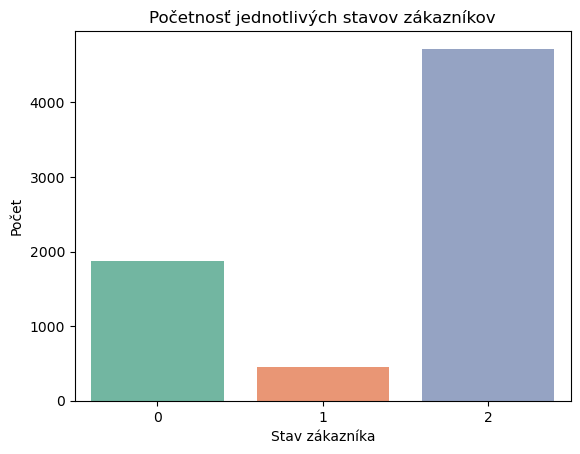

In [56]:
sns.countplot(data=df, x='Customer Status', palette = 'Set2')
plt.title('Početnosť jednotlivých stavov zákazníkov')
plt.xlabel('Stav zákazníka')
plt.ylabel('Počet')
plt.show()

Chcem docieliť aby sa zlúčili hodnoty 1 a 2. Definovanujeme funkcie transform_status s jedným argumentom status. Ak sa status rovná 1 alebo 2 tak vráti hodnotu 1. Inak vráti hodnotu 0. 

In [16]:
def transform_status(status):
    if status == 1 or status == 2:
        return 1
    else:
        return 0

Na atribút Customer Status aplikujeme túto funkciu pomocou funkcie apply. 

In [59]:
df['Customer Status'] = df['Customer Status'].apply(transform_status)

Správnosť funkcie si overíme pomocou value_counts, ktorý vypíše hodnoty a ich počet pre daný atribút

In [60]:
df['Customer Status'].value_counts()

1    5174
0    1869
Name: Customer Status, dtype: int64

Využijeme algoritmus K-Means. Ako prvé si do premennej kmeans zadefinujeme počet skupín do ktorých sa majú dáta rozdeliť a zabezpečíme, aby sme dosahovali rovnaké výsledky po opakovanom spustení kódu. Následne pomocou fit natrénujeme model na atribútoch Latitude a Longitude z datasetu. Nakoniec vytvoríme nový stĺpec Location_Group, do ktorého pomocou labels_ priradíme pre každý riadok čísla klastru.

In [61]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df[['Latitude', 'Longitude']])
df['Location_Group'] = kmeans.labels_

Pre grafické ľudí zobrazenie ľudí, ktorí odišli použijeme bodový graf scatter. Nastavíme jeho veľkosť v palcoch pomocou figure. Ako vstupné dáta zadefinujeme riadky Longitude a Latitude ale s tým, že Customer Status sa musí rovnať 0. To zabezpečí, že sa budú brať iba riadky zákazníkov, ktorí odišli. Parameter c bude priradzovať farby bodom na základe ich priradenia čísla klastru. Parameter cmap určuje farebné sfarbenie a parameter s veľkosť bodov v grafe. Pomocou xlabel a ylabel nastavíme popis x-ovej a y-psilovnej osi a title nám nastaví názov grafu. Riadok plt.colorbar(label='Skupina') vytvorí legendu pre zhluky a nastaví jej názov Skupina. Podľa farieb budeme vedieť určiť, ktorý bod predstavuje aký klaster. Pre lepší prehľad zobrazíme mriežku pomocou grid s hodnotou True. Nakonie graf zobrazíme pomocou show().

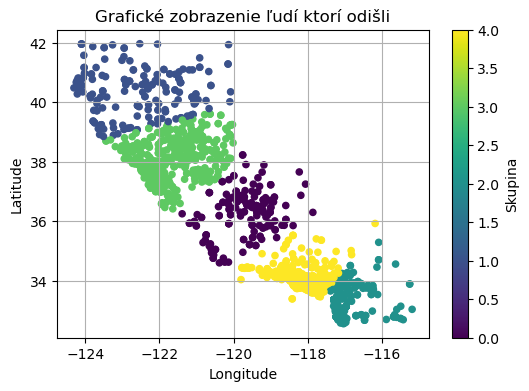

In [70]:
plt.figure(figsize=(6, 4))
plt.scatter(df[df['Customer Status'] == 0]['Longitude'], df[df['Customer Status'] == 0]['Latitude'], 
            c=df[df['Customer Status'] == 0]['Location_Group'], cmap='viridis', s=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Grafické zobrazenie ľudí ktorí odišli')
plt.colorbar(label='Skupina')
plt.grid(True)  #zobrazenie mriežky
plt.show()

Pred modelovaním odstránime stĺpce Customer ID, City, Zip Code, Latitude, Longitude pomocou funkcie drop.

In [72]:
df.drop(['Customer ID', 'City', 'Zip Code', 'Latitude', 'Longitude'], axis=1, inplace=True)

Pred modelovaním potrebujeme zistiť informačný zisk atribútov vzhľadom k cieľovému atribútu Customer Status a tie, ktoré budú mať vysoký informačný zisk použijeme pri modelovaní. Vytvoríme si premenné X a y. Do premennej X uložíme všetky atribúty okrem Customer Status a do cieľovej premennej y uložíme atribút Customer Status

In [22]:
X = df.drop('Customer Status', axis=1)
y = df['Customer Status'] 

Na získanie informačného zisku vytvoríme model pomocou rozhodovacieho stromu. Ako prvé si importujeme DecisionTreeClassifier z knižnice sklearn. Do premennej iz_model inicializujeme rozhodovací strom, ktorý bude dosahovať rovnaké výsledky. Následne dochádza k trénovaniu modelu na základe premenných X a y, ktoré obsahujú údaje z datasetu. Do premennej atributes uložíme dôležitosť jednotlivých atribútov pomocou feature_importances_. Pre výpis atribútov, ktorý majú väčšiu dôležitosť ako 0,02 použijeme cyklus for, ktorý prejde každý stĺpec v premennej X a ak presahuje túto hranicu tak sa vypíše spolu s jej hodnotou dôležistosti. 

In [23]:
from sklearn.tree import DecisionTreeClassifier

iz_model = DecisionTreeClassifier(random_state=42)
iz_model.fit(X, y)

atributes = iz_model.feature_importances_
for feature, importance in zip(X.columns, atributes):
    if importance > 0.02:
        print(f'{feature.ljust(35)}: {importance:.4f}')

Age                                : 0.1108
Number of Dependents               : 0.0267
Number of Referrals                : 0.0805
Tenure in Months                   : 0.0542
Avg Monthly Long Distance Charges  : 0.0573
Avg Monthly GB Download            : 0.0473
Contract                           : 0.2059
Monthly Charge                     : 0.1016
Total Charges                      : 0.0404
Total Long Distance Charges        : 0.0533
Total Revenue                      : 0.0423
Location_Group                     : 0.0262


Po úprave dát prichádzame k modelovaniu. Na modelovanie budeme potrebovať importovať funkciu train_test_split z knižnice sklearn na rozdelenie datasetu tréningovú a testovaciu sadu. Z knižnice sklearn importujeme funkciu accuracy_score na výpočet presnosti modelov. Ako ďalšie si importujeme algoritmy KNeighborsClassifier, SVC, RandomForestClassifier, AdaBoostClassifier, GaussianNB a LogisticRegression z knižnice sklearn, ktoré budeme potrebovať pri modelovaní. Nakoniec importujeme triedu GridSearchGV, ktorú použijeme na optimalizáciu parametrov. 

# modelovanie

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

Pre prácu s dôležitými atribútmi nepotrebujeme ich hodnoty informačného zisku, preto do premennej atributes_for_model uložíme iba názvy atribút bez ich hodnôt. Následným výpisom si overíme správnosť kódu.

In [25]:
atributes_for_model = [feature for feature, importance in zip(X.columns, atributes) if importance > 0.02]
atributes_for_model

['Age',
 'Number of Dependents',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Contract',
 'Monthly Charge',
 'Total Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Location_Group']

Pred modelovaním si potrebujeme dáta rozdeliť do tréningovej a testovacej množiny. Zadefinujeme si X a y. X bude obsahovať atribúty, ktoré budú použité na predikciu. Použijeme premennú atributes_for_model, v ktorej sú uložené atribúty s vyššou informačnou hodnotou. Premenná y bude predstavovať cieľovú premennú. Dáta X a y rozdelíme pomocou funkcie train_test_split na tréningovú a testovaciu sadu. Parameter test_size=0.2 určuje, že testovacia sada bude tvoriť 20% a tréningová sada bude tvoriť 80%. Parameter random_state=42 zabezpečí, že budeme dosahovať rovnaké výsledky po opätovnom spustení kódu.

In [26]:
X = df[atributes_for_model]
y = df['Customer Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Do premennej modely si uložíme algoritmy, ktoré budeme skúšať pri modelovaní. Bude tvorený z dvojice názvu algoritmu a jeho inštancie. Pri Logistic Regression bolo potrebné doplniť maximálny počet iterácií, ktorý sa upravuje vzhľadom k datasetu. Pre dostávanie rovnakých výsledok je potrebné u SVM, Decision Tree, Random Forest a AdaBoost pridanie random_state=42 pre dosahovanie konzistentných výsledkov.

In [27]:
modely = [
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("Logistic Regression", LogisticRegression(max_iter=3500)),
]

V tejto časti kódu dôjde k samotnému modelovaniu pomocou jednotlivých algoritmov. Na začiatok vytvoríme prázdny zoznam results, do ktorého sa budú ukladať názvy modelov a ich presnosť. Vytvoríme si cyklus, ktorý prejde každý model v zozname modely. Model sa natrénuje na tréningových dátach v X_train a y_train. Netrénovaný model sa použije na predikovanie hodnôt na testovacích dátach X_test. Do premennej accuracy uložíme vďaka funkcii accuracy_score presnosť modelu porovnaním skutočných hodnôt y_test a predikovaných hodnôt v premennej predictions. Do zoznamu results sa pridá názov modelu a jeho vypočítaná presnosť. Pomocou funkcie sort zoradíme modely podľa ich presnosti v zostupnom poradí. Pre výpis modelov a ich presnosti použijeme cyklus for, ktorý prejde celý zoznam results. Pre krajší výpis sa použije funkcia ljust s hodnotou 20, ktorá zarovná názov modelu naľavo a vyhradí priestor o veľkosti 20 znakov.

In [28]:
results = []
for name, model in modely:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results.append((name, accuracy))

results.sort(key=lambda x: x[1], reverse=True)

for name, accuracy in results:
    print(f"{name.ljust(20)}: {accuracy * 100:.2f}% úspešnosť")

Random Forest       : 82.97% úspešnosť
AdaBoost            : 82.33% úspešnosť
Logistic Regression : 81.48% úspešnosť
Decision Tree       : 77.71% úspešnosť
KNN                 : 75.59% úspešnosť
SVM                 : 73.53% úspešnosť
Gaussian Naive Bayes: 72.75% úspešnosť


Po zistení najlepších modelov dochádza k ich ladeniu pomocou GridSearchCV. Najprv je potrebné definovanie hyperparametrov, s ktorými sa bude pracovať. Do premennej rf_param_grid uložíme vybrané hyperparametre s hodnotami.

In [29]:
rf_param_grid = {
    'n_estimators': [118],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [5],
    'max_features': ['sqrt'],
    'criterion': ['entropy']
}

Do premennej rf_model vytvoríme inštanciu modelu Random Forest s parametrom random_state=42 pre konzistnetné výsledky. Do premennej rf_grid_search inicializujeme GridSearchSV pre optimalizáciu hyperparametrov modelu. Hyperparameter estimator nastavuje klasifikátor, pre ktorý použijeme rf_model. Druhý hyperparameter param_grid, ktorý definuje zoznam hyperparametrov s ktorými sa bude pracovať. Posledný hyperparameter cv určuje násobnú krížovú validáciu, ktorej priradíme hodnotu 5. 
Následne vykonáme tréning modelu pomocou GridSearch na tréningových dátach X_train a y_train. Do premennej rf_best_params uložíme najlepšie parametre, ktoré sme našli počas trénovania. Výpisom tejto premennej zistíme najlepšie hodnoty. Do premennej best_rf_model uložíme model s najlepšími hyperparametrami. V premennej y_pred dôjde k predikovaniu hodnôt na testovacích dátach X_test. Presnosť modelu získame pomocou accuracy_score porovnaním skutočných hodnôt y_test a predikovaných hodnôt y_pred. Túto presnosť uložíme do premennej rf_accuracy a následným výpisom zistíme prenosť modelu.

In [30]:
rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5)

rf_grid_search.fit(X_train, y_train)

rf_best_params = rf_grid_search.best_params_
print("Najlepšie parametre:", rf_best_params)

best_rf_model = rf_grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred)
print("Presnosť modelu Random Forest:", rf_accuracy)

Najlepšie parametre: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 118}
Presnosť modelu Random Forest: 0.8417317246273953


Rovnako ako pri modeli Random Forest budeme postupovať pri modeli AdaBoost. Zadefinujeme si zoznam ab_param_grid, do ktorej uložíme hyperparametre. Do premennej ab_model inicializujeme model AdaBoostClassifier a do premennej ab_grid_search inicializujeme GridSearchCV s rovnakými parametrami a ich hodnotami ako v prípade Random Forest. Pomocou fit dôjde k trénovaniu modelu pomocou GridSearch a do premennej ab_best_params uložíme najlepšie hyperparametre zistené počas trénovania. Následným výpisom zistíme o aké hyperparamtre ide. Do best_ab_model sme uložili model s najlepšími hyperparametrami pomocou funkcie best_estimator_. Tento model použijeme na predikovanie hodnôt na testovacích dáta X_test, ktorý sa uloží do premennej y_pred. Pomocou funkcie accuracy_score vyhodnotíme presnosť porovnaním skutočných hodnôt a predikovancýh hodnôt. Výsledok uložíme do premennej ab_accuracy a výpisom zistíme danú presnosť.

In [31]:
ab_param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.45],
}

ab_model = AdaBoostClassifier()
ab_grid_search = GridSearchCV(estimator=ab_model, param_grid=ab_param_grid, cv=5)

ab_grid_search.fit(X_train, y_train)

ab_best_params = ab_grid_search.best_params_
print("Najlepšie parametre:", ab_best_params)

best_ab_model = ab_grid_search.best_estimator_
y_pred = best_ab_model.predict(X_test)

ab_accuracy = accuracy_score(y_test, y_pred)
print("Presnosť modelu AdaBoost:", ab_accuracy)

Najlepšie parametre: {'learning_rate': 0.45, 'n_estimators': 50}
Presnosť modelu AdaBoost: 0.837473385379702


Pre porovnanie uskutočníme výpis presností pre jeden aj druhý model.

In [32]:
print(f"Presnosť modelu Logistickej regresie:, {rf_accuracy * 100:.2f}%")
print(f"Presnosť modelu AdaBoost:, {ab_accuracy * 100:.2f}%")

Presnosť modelu Logistickej regresie:, 84.17%
Presnosť modelu AdaBoost:, 83.75%
